## Steps to go through projct For all algorithms
1. Import the needed Libraries
2. Read the dataset(CSV File)
3. Data Visualization
4. Helper function and plotting
5. K-Nearest Neighbors
6. Logistic Regression
7. Naïve Bayes
8. Decision Trees
9. Support Vector Machines
10. metrics comparison

# Utiles



In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

# models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# metrics performance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import f1_score

#grid search to find the optimal hyperparameters.
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, cross_val_predict

# Reading the Data
The data used in this project will help to identify whether a person is going to recover from coronavirus symptoms or not based on some pre-defined standard symptoms. These symptoms are based on guidelines given by the World Health Organization (WHO).

This dataset has daily level information on the number of affected cases, deaths and recovery from 2019 novel coronavirus.

Please note that this is a time series data and so the number of cases on
any given day is the cumulative number.

The data is available from 22 Jan, 2020. Data is in 'data.csv'.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Dreams come true ^^/master/AI & ML/Project/data.csv',delimiter=',',index_col=0)

# Show data sample
The dataset contains 14 major variables that will be having an impact on whether someone has recovered or not, the description of each variable are as follows,
1. Country: where the person resides.
2. Location: which part in the Country.
3. Age: Classification of the age group for each person, based on WHO Age Group Standard.
4. Gender: Male or Female.
5. Visited_Wuhan: whether the person has visited Wuhan, China or not.
6. From_Wuhan: whether the person is from Wuhan, China or not.
7. Symptoms: there are six families of symptoms that are coded in six fields.
13. Time_before_symptoms_appear.
14. Result: death (1) or recovered (0).

In [ ]:
data.head()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


In [ ]:
data.info()
###### comment on output cell : no missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 863 entries, 0 to 862
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   location      863 non-null    int64  
 1   country       863 non-null    int64  
 2   gender        863 non-null    int64  
 3   age           863 non-null    float64
 4   vis_wuhan     863 non-null    int64  
 5   from_wuhan    863 non-null    int64  
 6   symptom1      863 non-null    int64  
 7   symptom2      863 non-null    int64  
 8   symptom3      863 non-null    int64  
 9   symptom4      863 non-null    int64  
 10  symptom5      863 non-null    int64  
 11  symptom6      863 non-null    int64  
 12  diff_sym_hos  863 non-null    int64  
 13  result        863 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 101.1 KB


In [ ]:
data.result.value_counts()
##### comment on output cell : there is unbalanced data

0    755
1    108
Name: result, dtype: int64

# Data Visualisation


<AxesSubplot:title={'center':'Data shows that age is the most feature has an correlation with the result and the other features are lower than age'}>

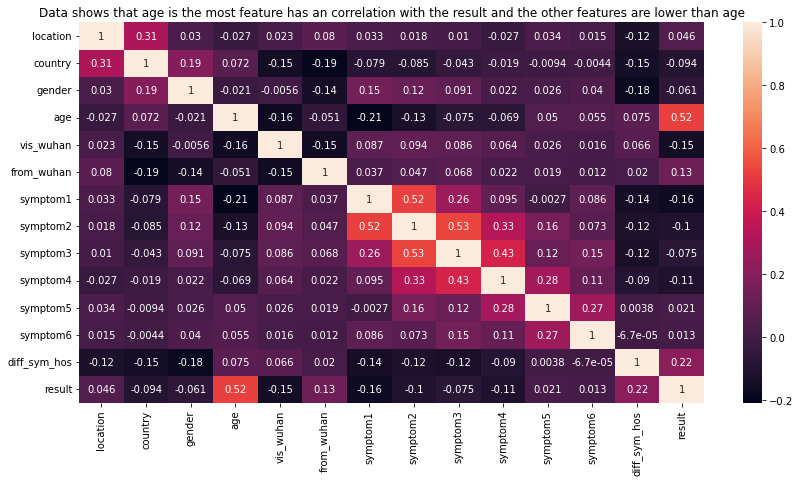

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(14,7))

# Add title
plt.title("Data shows that age is the most feature has an correlation with the result and the other features are lower than age")

# Heatmap showing average arrival delay for each airline by month
sns.heatmap(data=data.corr(), annot=True)


<AxesSubplot:title={'center':'the relation between symptom and it shows that there is no direct relation'}, ylabel='result'>

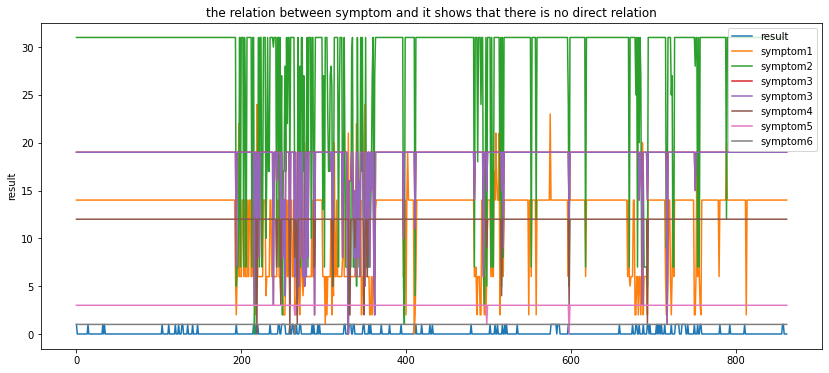

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(14,6))

# Add title
plt.title("the relation between symptom and it shows that there is no direct relation")

# Line chart showing data of 'result'
sns.lineplot(data=data['result'], label="result")

# Line chart showing data of 'symptom1'
sns.lineplot(data=data['symptom1'], label="symptom1")

# Line chart showing data of 'symptom2'
sns.lineplot(data=data['symptom2'], label="symptom2")

# Line chart showing data of 'symptom3'
sns.lineplot(data=data['symptom3'], label="symptom3")

# Line chart showing data of 'symptom4'
sns.lineplot(data=data['symptom3'], label="symptom3")

# Line chart showing data of 'symptom5'
sns.lineplot(data=data['symptom4'], label="symptom4")

# Line chart showing data of 'symptom6'
sns.lineplot(data=data['symptom5'], label="symptom5")

# Line chart showing data of 'symptom6'
sns.lineplot(data=data['symptom6'], label="symptom6")

<AxesSubplot:title={'center':'Male vs Female vs Unknown'}, xlabel='gender'>

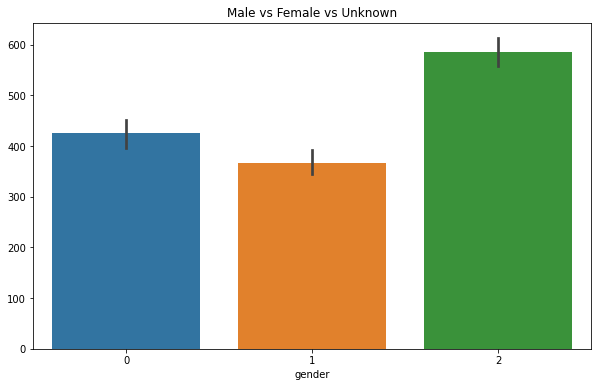

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Male vs Female vs Unknown")

# Bar chart showing average gender for data
sns.barplot(x=data['gender'], y=data.index)


/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 82.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 24.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:title={'center':'swarm chart showing average gender for data per result 0, 1.  Comment: little number of patients with gender 2'}, xlabel='result', ylabel='gender'>

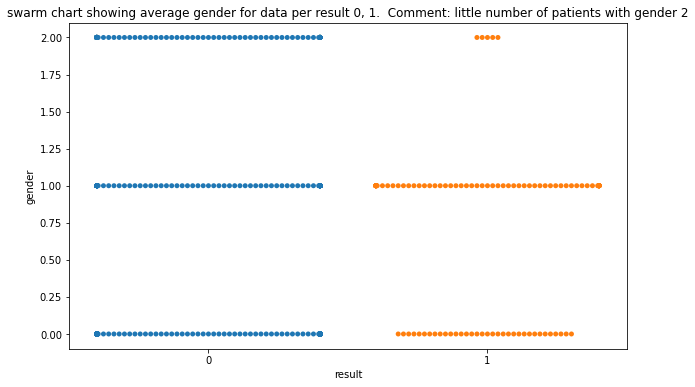

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("swarm chart showing average gender for data per result 0, 1.  Comment: little number of patients with gender 2")

# swarm chart showing average gender for data per result 0, 1
sns.swarmplot(x=data['result'],
              y=data['gender'])

<AxesSubplot:xlabel='gender', ylabel='Count'>

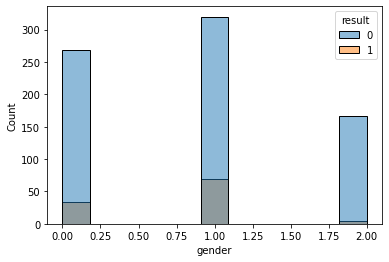

In [ ]:
sns.histplot(data=data,x="gender",hue=data.result) # same comment

<AxesSubplot:title={'center':'There is some negative values. We need to remove it'}, xlabel='diff_sym_hos'>

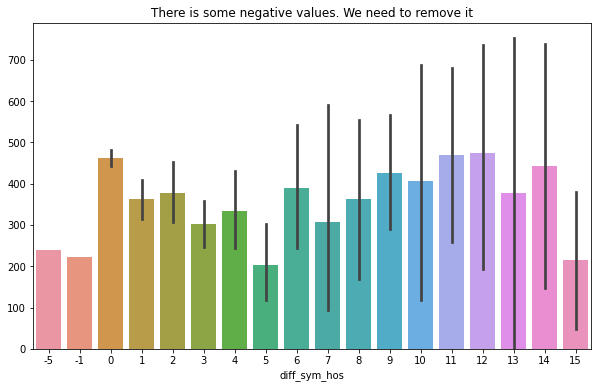

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("There is some negative values. We need to remove it")

# Bar chart showing diff_sym_hos for data
sns.barplot(x=data['diff_sym_hos'], y=data.index)

<AxesSubplot:xlabel='diff_sym_hos', ylabel='Density'>

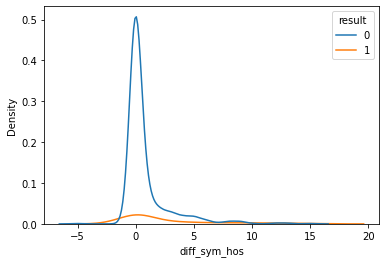

In [ ]:
sns.kdeplot(data=data, x="diff_sym_hos", hue="result") # some value are negative

<AxesSubplot:title={'center':'Total Average ages are from 1 to 95 and maximum at 50 '}, xlabel='age', ylabel='Density'>

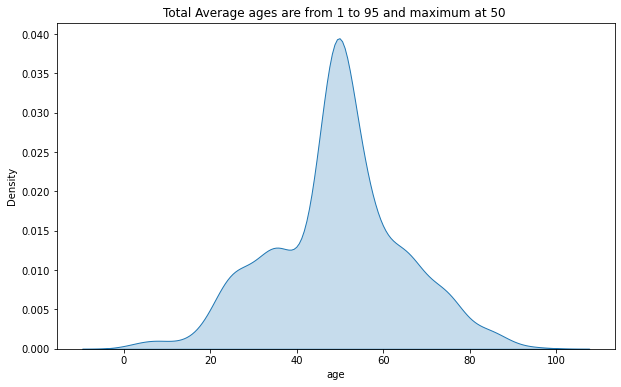

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Total Average ages are from 1 to 95 and maximum at 50 ")

# kde chart showing age for data
sns.kdeplot(data=data.age, shade=True)

<AxesSubplot:title={'center':'Total Average ages who are patients are from 55 to 90 and maximum at 75 '}, xlabel='age', ylabel='Density'>

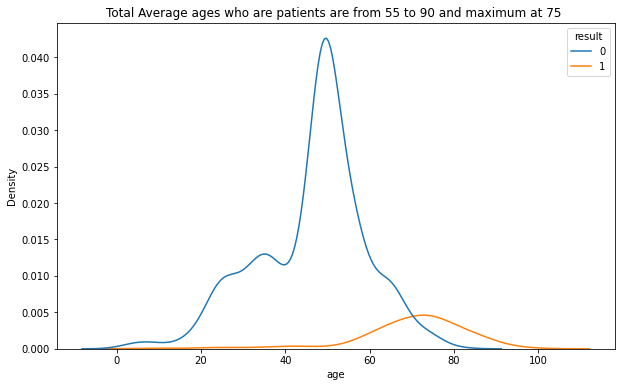

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Total Average ages who are patients are from 55 to 90 and maximum at 75 ")

# kde chart showing age for data
sns.kdeplot(data=data, x="age", hue="result")

<AxesSubplot:title={'center':"It shows that people who have visted wuhan don't suffer from covid"}, xlabel='vis_wuhan', ylabel='Count'>

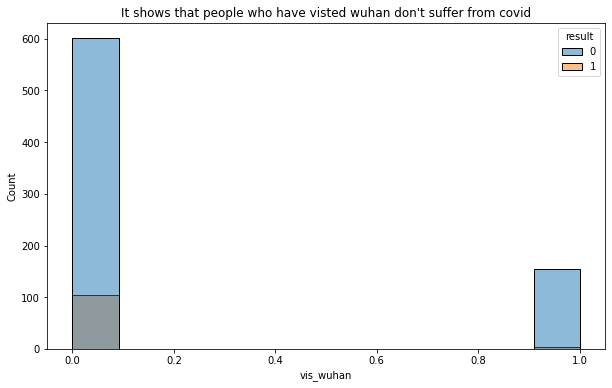

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("It shows that people who have visted wuhan don't suffer from covid")

# hist chart showing visited wuhan for data
sns.histplot(data=data,x="vis_wuhan",hue=data.result)

<AxesSubplot:title={'center':'It shows that half of people from wuhan suffer from the disease'}, xlabel='from_wuhan', ylabel='Count'>

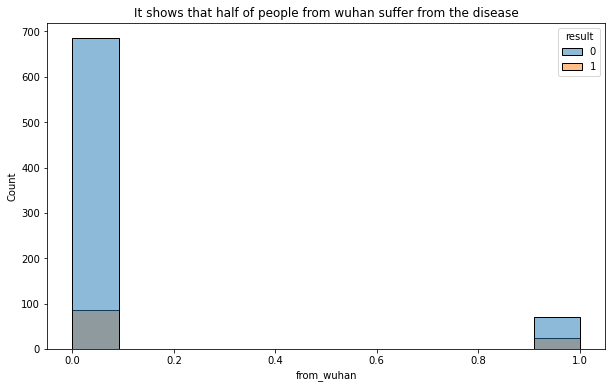

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("It shows that half of people from wuhan suffer from the disease")

# hist chart showing from_wuhan for data
sns.histplot(data=data,x="from_wuhan",hue=data.result)

<AxesSubplot:title={'center':'countries at 15, 20 have the biggest number of patients'}, xlabel='country', ylabel='Count'>

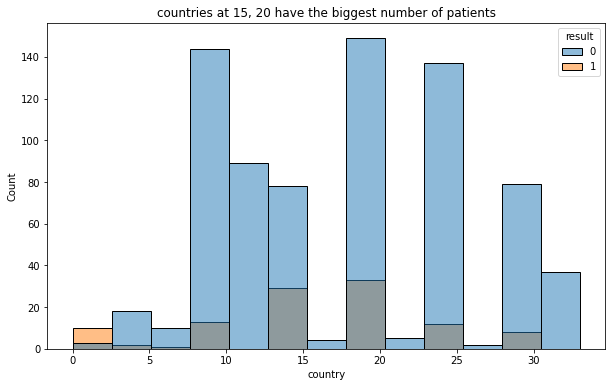

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("countries at 15, 20 have the biggest number of patients")

# hist chart showing country for data
sns.histplot(data=data,x="country",hue=data.result)

<AxesSubplot:title={'center':'Average countries from 5 to 30 have the number of patients'}, xlabel='country', ylabel='Density'>

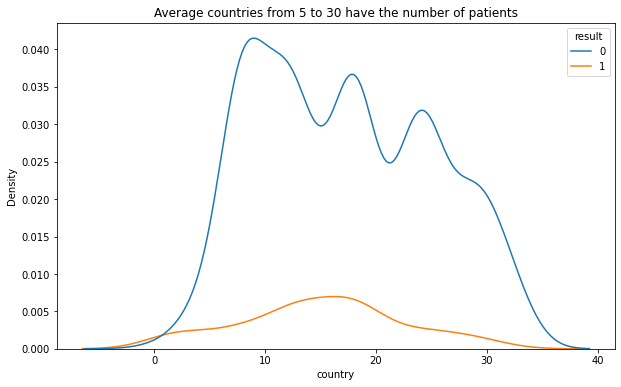

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Average countries from 5 to 30 have the number of patients")

# kde chart showing country for data
sns.kdeplot(data=data, x="country", hue="result")

<AxesSubplot:title={'center':'location at 40 have the biggest number of patients'}, xlabel='location', ylabel='Count'>

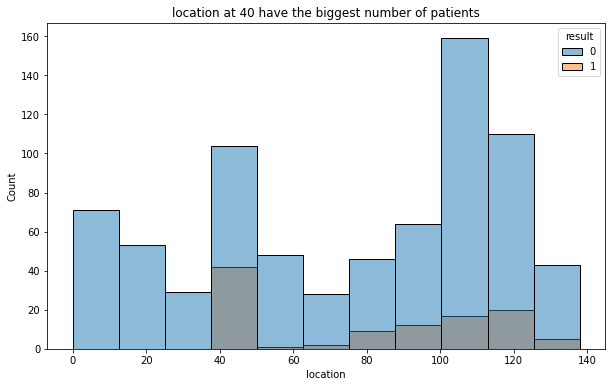

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("location at 40 have the biggest number of patients")

# hist chart showing location for data
sns.histplot(data=data,x="location",hue=data.result)

<AxesSubplot:title={'center':'Average location from 40 to 135 have the number of patients'}, xlabel='location', ylabel='Density'>

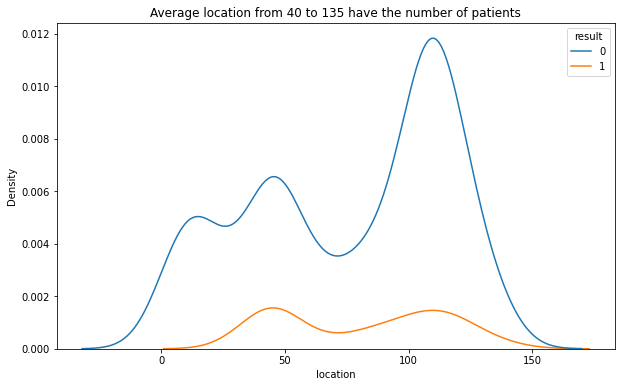

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Average location from 40 to 135 have the number of patients")

# kde chart showing location for data
sns.kdeplot(data=data,x="location",hue=data.result)

# Normalization and splitting data


divide the data into three partitions: training, validation, and testing.

In [ ]:
y= data.result
x=data.drop("result",axis=1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,stratify =y )

In [ ]:
x.columns

Index(['location', 'country', 'gender', 'age', 'vis_wuhan', 'from_wuhan',
       'symptom1', 'symptom2', 'symptom3', 'symptom4', 'symptom5', 'symptom6',
       'diff_sym_hos'],
      dtype='object')

In [ ]:
print ("number of positive and negative samples in y train",len(y_train))
print ("number of positive samples only in y train",y_train.sum())
print ("number of negative samples only in y train",len(y_train)-y_train.sum())

number of positive and negative samples in y train 690
number of positive samples only in y train 86
number of negative samples only in y train 604


In [ ]:
print ("number of positive and negative samples in y test",len(y_test))
print ("number of positive samples only in y test",y_test.sum())
print ("number of negative samples only in y test",len(y_test)-y_test.sum())

number of positive and negative samples in y test 173
number of positive samples only in y test 22
number of negative samples only in y test 151


In [ ]:
#standardization
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

# Designing models and metrics

You need to design the following classifiers:
1. K-Nearest Neighbors
2. Logistic Regression
3. Naïve Bayes
4. Decision Trees
5. Support Vector Machines

In [ ]:
#  Metrics Lists
accuracies = []
aucs = []
f1scores = []
models = []
labels = []

# Plot Functions
def plotCrossValidationComparison(model_scores):
  indics = range(1, model_scores.shape[1] + 1)
  ranks = ['Rank 1', 'Rank 2', 'Rank 3', 'Rank 4', 'Rank 5']
  for accuracy, index in zip(model_scores, indics):
    plt.plot(ranks, accuracy, label = f'model: {index}', marker='o', linestyle='dashed')
  plt.title('Cross Validation Comparsion')
  plt.xlabel("CV test fold")
  plt.ylabel("Model Accuracy")
  plt.legend()
  plt.show()

# Helper Functions


*   GridSearch job.
*   Display GridSearch best Hyper-parameters.
*   classificationReport.





In [ ]:
from sklearn.metrics import precision_score , recall_score , precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [ ]:
def get_metrics (y_test,y_pred):
  print("accuracy_score : ",accuracy_score(y_test,y_pred))
  print("precision_score : ",precision_score(y_test , y_pred))
  print("recall_score : " ,recall_score(y_test , y_pred))
  print("f1_score : ",f1_score(y_test , y_pred))
  print("roc_auc_score : ",roc_auc_score(y_test , y_pred))

def confusionMatrix(Matrix):
    fig, ax = plt.subplots(figsize=(7.5, 7.5))
    ax.matshow(Matrix, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(Matrix.shape[0]):
        for j in range(Matrix.shape[1]):
            ax.text(x=j, y=i,s=Matrix[i, j], va='center', ha='center', size='xx-large')

    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()

In [ ]:
def classificationReport(model, X_test, y_test):
  y_pred = model.predict(X_test)
  # Store Metrics
  accuracy = model.score(X_test, y_test)
  f1score = f1_score(y_test, y_pred)
  accuracies.append(accuracy)
  f1scores.append(f1score)
  # Classification Report
  print(classification_report(y_test, y_pred, labels = model.classes_))
  print()
  # Precision Vs Recall curve
  precision, recall, _ = precision_recall_curve(y_test, y_pred)
  PrecisionRecallDisplay(precision = precision, recall = recall).plot()
  plt.title('Precision Vs Recall')
  plt.show()
  print()
  # ROC/AUC
  fpr, tpr, _ = roc_curve(y_test, y_pred)
  roc_auc = auc(fpr, tpr)
  aucs.append(roc_auc)
  RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc, estimator_name = model.__class__.__name__).plot()
  plt.title('ROC/AUC')
  plt.show()
  print()
  conf_matrix = confusion_matrix(y_test, y_pred)
  ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = model.classes_).plot()
  plt.title('Confusion Matrix')
  plt.show()


def gridSearch(model, parameters):
  kfold = 5
  scoring = 'accuracy'
  verbose = 5

  grid_search = GridSearchCV(estimator = model, param_grid = parameters, cv = kfold, scoring = scoring, verbose = verbose)
  grid_search.fit(x_train, y_train)
  results = pd.DataFrame(grid_search.cv_results_)
  best_model = grid_search.best_estimator_
  model_name = best_model.__class__.__name__
  models.append(best_model)
  labels.append(model_name)
  print('##########')
  print()
  print(f'{model_name}')
  print('##########')
  print()
  print('After running the grid search with cross validation we found that the best Hyper-Parameter are :')
  print()
  print(grid_search.best_params_)
  print('##########')
  print()
  print('Grid Search Summary :')
  print()
  display(results.sort_values(by=['rank_test_score']).head())
  print('##########')
  print()
  model_scores = results.filter(regex=r"split\d*_test_score")
  plotCrossValidationComparison(model_scores.loc[0:5].values)
  print()
  return best_model

# 1- Using K-Nearest Neighbors


**Grid Search**

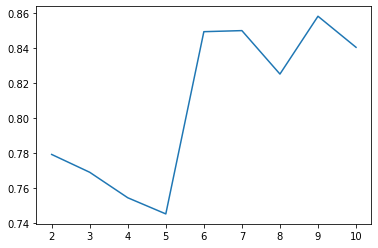

In [ ]:
#finding the best cross validation value that maximize the recall
knn_cv_scores = []
i_range = list(range (2,11))

for i in i_range:
    scores = cross_val_score(DecisionTreeClassifier() , x_train_scaled, y_train, cv = i,scoring='recall')
    knn_cv_scores.append(scores.mean())
plt.plot(i_range, knn_cv_scores)

#cv=9 is the best

Fitting 5 folds for each of 38 candidates, totalling 190 fits
[CV 1/5] END ................n_neighbors=1, p=1;, score=0.877 total time=   0.0s
[CV 2/5] END ................n_neighbors=1, p=1;, score=0.971 total time=   0.0s
[CV 3/5] END ................n_neighbors=1, p=1;, score=0.949 total time=   0.0s
[CV 4/5] END ................n_neighbors=1, p=1;, score=0.928 total time=   0.0s
[CV 5/5] END ................n_neighbors=1, p=1;, score=0.928 total time=   0.0s
[CV 1/5] END ................n_neighbors=1, p=2;, score=0.877 total time=   0.0s
[CV 2/5] END ................n_neighbors=1, p=2;, score=0.949 total time=   0.0s
[CV 3/5] END ................n_neighbors=1, p=2;, score=0.942 total time=   0.0s
[CV 4/5] END ................n_neighbors=1, p=2;, score=0.913 total time=   0.0s
[CV 5/5] END ................n_neighbors=1, p=2;, score=0.913 total time=   0.0s
[CV 1/5] END ................n_neighbors=2, p=1;, score=0.884 total time=   0.0s
[CV 2/5] END ................n_neighbors=2, p=1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009097,0.004920,0.011659,0.003210,1,1,"{'n_neighbors': 1, 'p': 1}",0.876812,0.971014,0.949275,0.927536,0.927536,0.930435,0.031286,1
25,0.003545,0.000232,0.008922,0.000764,13,2,"{'n_neighbors': 13, 'p': 2}",0.927536,0.949275,0.927536,0.927536,0.905797,0.927536,0.013749,2
21,0.003783,0.000337,0.010510,0.001793,11,2,"{'n_neighbors': 11, 'p': 2}",0.905797,0.949275,0.927536,0.920290,0.927536,0.926087,0.014051,3
35,0.003349,0.000107,0.009632,0.000695,18,2,"{'n_neighbors': 18, 'p': 2}",0.920290,0.942029,0.927536,0.934783,0.898551,0.924638,0.014921,4
33,0.003266,0.000033,0.009212,0.000165,17,2,"{'n_neighbors': 17, 'p': 2}",0.927536,0.942029,0.927536,0.934783,0.891304,0.924638,0.017512,4


##########



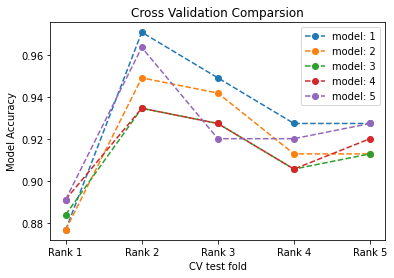

In [ ]:
parameters = {'n_neighbors':list(range(1, 20)), 'p': [1, 2]}
knn = gridSearch(KNeighborsClassifier(), parameters)

Classification Report

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       151
           1       0.88      0.68      0.77        22

    accuracy                           0.95       173
   macro avg       0.92      0.83      0.87       173
weighted avg       0.95      0.95      0.95       173




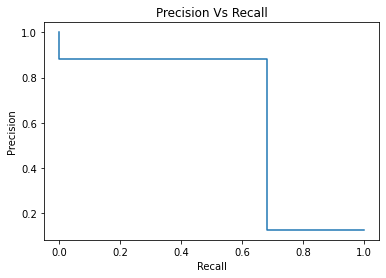

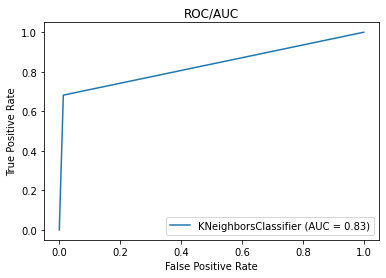

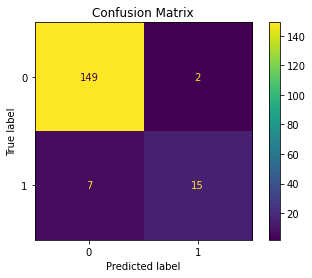

In [ ]:
# Classification Report
classificationReport(knn, x_test, y_test)

# 2- Logistic Regression

The available choices:
- ‘lbfgs’ - [‘l2’, None]
- ‘liblinear’ - [‘l1’, ‘l2’]
- ‘newton-cg’ - [‘l2’, None]
- ‘newton-cholesky’ - [‘l2’, None]
- ‘sag’ - [‘l2’, None]
- ‘saga’ - [‘elasticnet’, ‘l1’, ‘l2’, None]

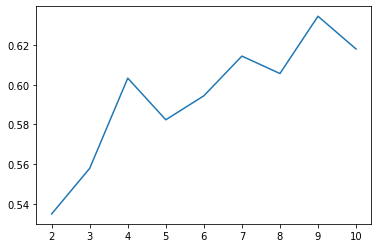

In [ ]:
#finding the best cross validation value that maximize the recall

logreg_cv_scores = []
i_range = list(range (2,11))

for i in i_range:
    scores = cross_val_score(LogisticRegression() , x_train_scaled, y_train, cv = i,scoring='recall')
    logreg_cv_scores.append(scores.mean())
plt.plot(i_range, logreg_cv_scores)

#cv=3 is the best

**Grid Search**

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END C=1e-05, penalty=l1, solver=liblinear;, score=0.877 total time=   0.0s
[CV 2/5] END C=1e-05, penalty=l1, solver=liblinear;, score=0.877 total time=   0.0s
[CV 3/5] END C=1e-05, penalty=l1, solver=liblinear;, score=0.877 total time=   0.0s
[CV 4/5] END C=1e-05, penalty=l1, solver=liblinear;, score=0.877 total time=   0.0s
[CV 5/5] END C=1e-05, penalty=l1, solver=liblinear;, score=0.870 total time=   0.0s
[CV 1/5] END C=1e-05, penalty=l2, solver=liblinear;, score=0.877 total time=   0.0s
[CV 2/5] END C=1e-05, penalty=l2, solver=liblinear;, score=0.877 total time=   0.0s
[CV 3/5] END C=1e-05, penalty=l2, solver=liblinear;, score=0.877 total time=   0.0s
[CV 4/5] END C=1e-05, penalty=l2, solver=liblinear;, score=0.877 total time=   0.0s
[CV 5/5] END C=1e-05, penalty=l2, solver=liblinear;, score=0.870 total time=   0.0s
[CV 1/5] END C=0.0001, penalty=l1, solver=liblinear;, score=0.877 total time=   0.0s
[CV 2/5] END C

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
14,0.016374,0.001657,0.001575,0.000281,100.0,l1,liblinear,"{'C': 100.0, 'penalty': 'l1', 'solver': 'libli...",0.927536,0.949275,0.92029,0.942029,0.927536,0.933333,0.010650,1
16,0.018052,0.004346,0.001465,0.000187,1000.0,l1,liblinear,"{'C': 1000.0, 'penalty': 'l1', 'solver': 'libl...",0.927536,0.949275,0.92029,0.934783,0.927536,0.931884,0.009829,2
17,0.006857,0.000442,0.001506,0.000058,1000.0,l2,liblinear,"{'C': 1000.0, 'penalty': 'l2', 'solver': 'libl...",0.927536,0.934783,0.92029,0.942029,0.927536,0.930435,0.007390,3
15,0.007126,0.000752,0.001648,0.000141,100.0,l2,liblinear,"{'C': 100.0, 'penalty': 'l2', 'solver': 'libli...",0.927536,0.934783,0.92029,0.942029,0.927536,0.930435,0.007390,3
12,0.033413,0.028926,0.001650,0.000292,10.0,l1,liblinear,"{'C': 10.0, 'penalty': 'l1', 'solver': 'liblin...",0.927536,0.934783,0.92029,0.942029,0.927536,0.930435,0.007390,3


##########



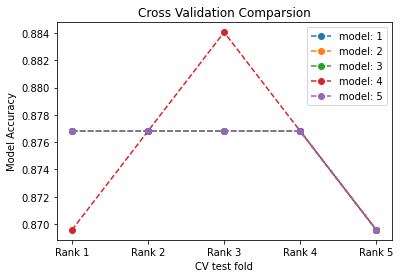

In [ ]:
parameters = {'penalty':('l1', 'l2'),
              'solver':['liblinear'],
              'C':[1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3]}

log_reg = gridSearch(LogisticRegression(), parameters)

Classification Report

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       151
           1       0.89      0.77      0.83        22

    accuracy                           0.96       173
   macro avg       0.93      0.88      0.90       173
weighted avg       0.96      0.96      0.96       173




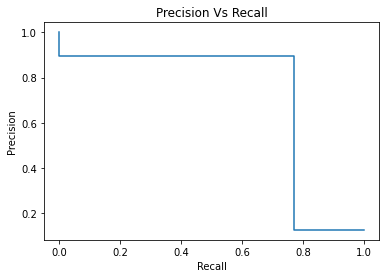

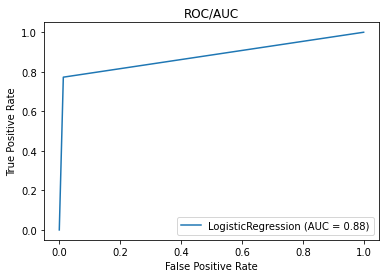

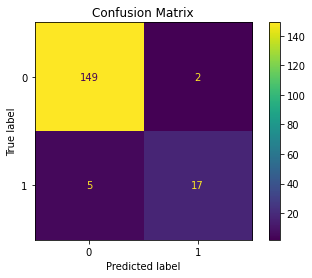

In [ ]:
classificationReport(log_reg, x_test, y_test)

# 3- Naïve Bayes

We will try different Naive Bayes algrithms:
- Gaussian
- Multinomial
- Complement
- Bernoulli
- Categorical

After trail and error we figure that **Multinomial** is the most suitable for this problem.

In [ ]:
from sklearn.preprocessing import MinMaxScaler #fixed import

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ...........................alpha=1;, score=0.877 total time=   0.0s
[CV 2/5] END ...........................alpha=1;, score=0.877 total time=   0.0s
[CV 3/5] END ...........................alpha=1;, score=0.877 total time=   0.0s
[CV 4/5] END ...........................alpha=1;, score=0.877 total time=   0.0s
[CV 5/5] END ...........................alpha=1;, score=0.870 total time=   0.0s
[CV 1/5] END ...........................alpha=2;, score=0.877 total time=   0.0s
[CV 2/5] END ...........................alpha=2;, score=0.877 total time=   0.0s
[CV 3/5] END ...........................alpha=2;, score=0.877 total time=   0.0s
[CV 4/5] END ...........................alpha=2;, score=0.877 total time=   0.0s
[CV 5/5] END ...........................alpha=2;, score=0.870 total time=   0.0s
[CV 1/5] END ...........................alpha=3;, score=0.877 total time=   0.0s
[CV 2/5] END ...........................alpha=3;

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001889,0.000326,0.000688,0.000131,1,{'alpha': 1},0.876812,0.876812,0.876812,0.876812,0.869565,0.875362,0.002899,1
1,0.001831,0.000269,0.001972,0.002755,2,{'alpha': 2},0.876812,0.876812,0.876812,0.876812,0.869565,0.875362,0.002899,1
2,0.001689,0.000111,0.001191,0.001204,3,{'alpha': 3},0.876812,0.876812,0.876812,0.876812,0.869565,0.875362,0.002899,1
3,0.001655,0.000083,0.000577,0.000059,4,{'alpha': 4},0.876812,0.876812,0.876812,0.876812,0.869565,0.875362,0.002899,1
4,0.006108,0.003773,0.000609,0.000085,5,{'alpha': 5},0.876812,0.876812,0.876812,0.876812,0.869565,0.875362,0.002899,1


##########



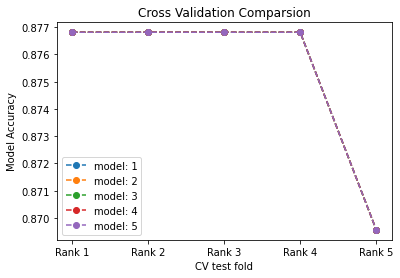

In [ ]:
parameters = {'alpha': range(1, 11)}

multinominal = gridSearch(MultinomialNB(), parameters)

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       151
           1       0.00      0.00      0.00        22

    accuracy                           0.87       173
   macro avg       0.44      0.50      0.47       173
weighted avg       0.76      0.87      0.81       173




/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


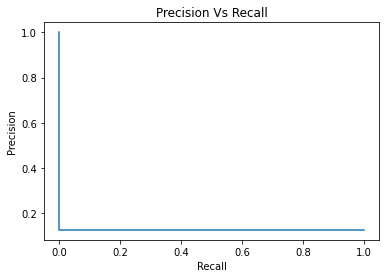

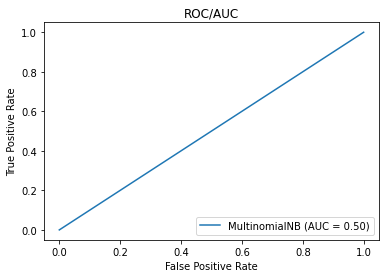

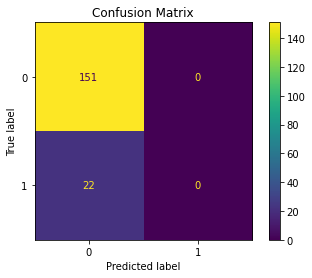

In [ ]:
classificationReport(multinominal, x_test, y_test)

In [ ]:
naive_clf =  GaussianNB()
naive_clf.fit(x_train,y_train) #we don't use scaled x with naive bayes
naive_y_pred = naive_clf.predict(x_test)

In [ ]:
get_metrics(y_test,naive_y_pred)

accuracy_score :  0.30057803468208094
precision_score :  0.14893617021276595
recall_score :  0.9545454545454546
f1_score :  0.2576687116564417
roc_auc_score :  0.5799217338952438


In [ ]:
Naive_bayes_score = ["Naive bayes",accuracy_score(y_test,naive_y_pred),precision_score(y_test , naive_y_pred),\
                     recall_score(y_test , naive_y_pred),f1_score(y_test , naive_y_pred),f1_score(y_test , naive_y_pred)]

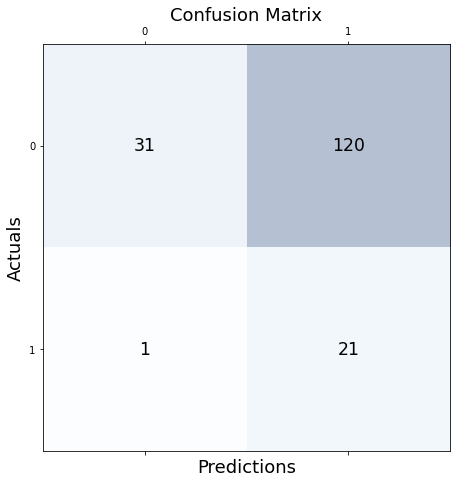

In [ ]:
conf_matrixLGB = confusion_matrix(y_true=y_test, y_pred=naive_y_pred)
confusionMatrix(conf_matrixLGB)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


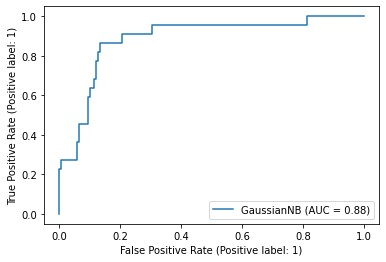

In [ ]:
metrics.plot_roc_curve(naive_clf, x_test, y_test)
plt.show()

# 4- Decision Trees

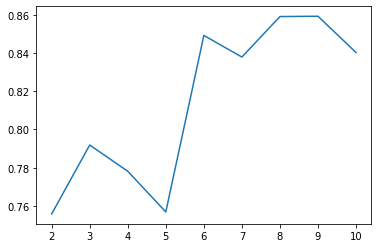

In [ ]:
#finding the best cross validation value that maximize the recall
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
tree_cv_scores = []
i_range = list(range (2,11))

for i in i_range:
    scores = cross_val_score(DecisionTreeClassifier() , x_train, y_train, cv = i,scoring='recall')
    tree_cv_scores.append(scores.mean())

plt.plot(i_range, tree_cv_scores)
#cv=5 is the best

**Grid Search**

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV 1/5] END criterion=gini, max_depth=8, min_samples_split=5;, score=0.920 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, min_samples_split=5;, score=0.978 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, min_samples_split=5;, score=0.935 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, min_samples_split=5;, score=0.964 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, min_samples_split=5;, score=0.942 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, min_samples_split=10;, score=0.920 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, min_samples_split=10;, score=0.957 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, min_samples_split=10;, score=0.928 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, min_samples_split=10;, score=0.964 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, min_samples_split=10;, score=0.913 to

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
39,0.001855,0.000031,0.000393,0.000012,entropy,14,5,"{'criterion': 'entropy', 'max_depth': 14, 'min...",0.963768,0.971014,0.949275,0.971014,0.949275,0.960870,0.009829,1
36,0.001647,0.000238,0.000352,0.000018,entropy,13,5,"{'criterion': 'entropy', 'max_depth': 13, 'min...",0.963768,0.971014,0.949275,0.971014,0.949275,0.960870,0.009829,1
24,0.001753,0.000040,0.000354,0.000018,entropy,9,5,"{'criterion': 'entropy', 'max_depth': 9, 'min_...",0.956522,0.971014,0.942029,0.971014,0.956522,0.959420,0.010845,3
21,0.001860,0.000379,0.000489,0.000089,entropy,8,5,"{'criterion': 'entropy', 'max_depth': 8, 'min_...",0.963768,0.971014,0.942029,0.971014,0.949275,0.959420,0.011774,3
27,0.001674,0.000081,0.000339,0.000022,entropy,10,5,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.956522,0.971014,0.956522,0.971014,0.934783,0.957971,0.013283,5


##########



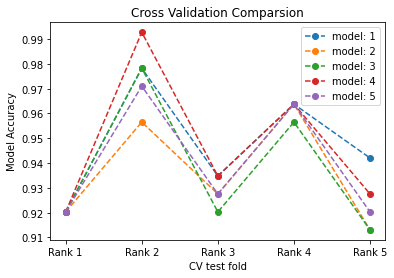

In [ ]:
parameters = {'criterion':['gini', 'entropy'],
              'max_depth':range(8, 15),
              'min_samples_split':[5, 10, 20]}

d_tree = gridSearch(DecisionTreeClassifier(), parameters)

Classification Report

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       151
           1       0.95      0.82      0.88        22

    accuracy                           0.97       173
   macro avg       0.96      0.91      0.93       173
weighted avg       0.97      0.97      0.97       173




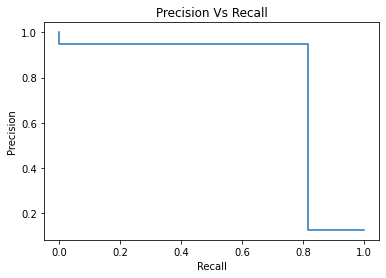

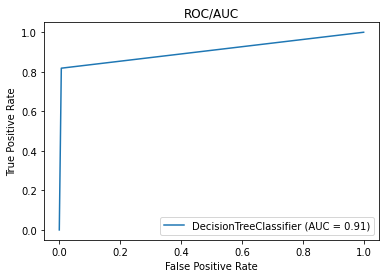

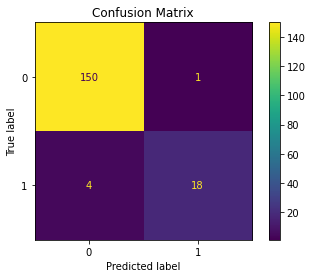

In [ ]:
classificationReport(d_tree, x_test, y_test)

In [ ]:
#bulding tree with the optimal parameters
tree_clf = DecisionTreeClassifier (criterion = "entropy" , max_depth = 12 ,max_features = "auto" ,min_samples_split = 3 ,splitter = "best",
class_weight ="balanced")
tree_clf.fit(x_train,y_train)
tree_y_pred = tree_clf.predict(x_test)

In [ ]:
#plotting our tree
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(tree_clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("covid")

'covid.pdf'

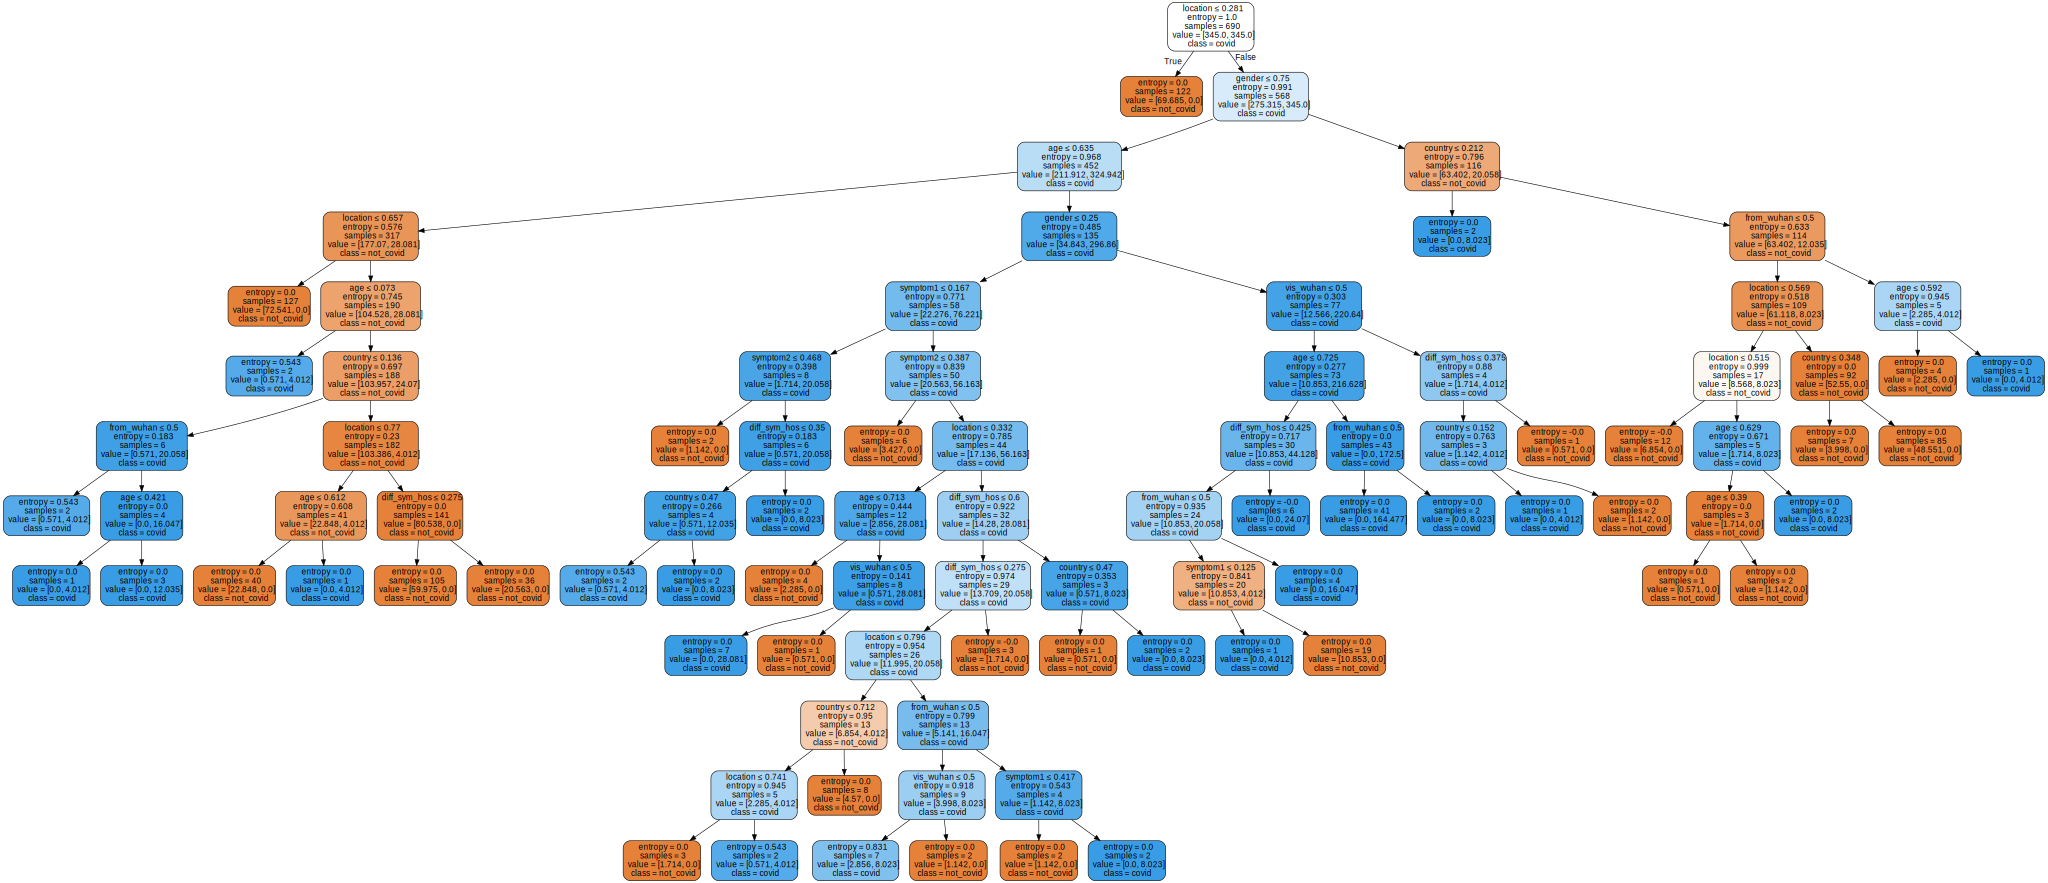

In [ ]:
dot_data = tree.export_graphviz(tree_clf, out_file=None,
                      feature_names=data.columns[:-1],
                     class_names=["not_covid","covid"],
                      filled=True, rounded=True,
                     special_characters=True)
graph = graphviz.Source(dot_data)
graph

# 5- Support Vector Machines

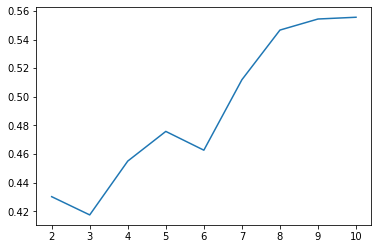

In [ ]:
#finding the best cross validation value that maximize the recall
svc_cv_scores = []
i_range = list(range (2,11))

for i in i_range:
    scores = cross_val_score(SVC() , x_train_scaled, y_train, cv = i,scoring='recall')
    svc_cv_scores.append(scores.mean())

plt.plot(i_range, svc_cv_scores)
#cv=6 is the best

**Grid Search**

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END .....C=0.001, degree=2, kernel=rbf;, score=0.877 total time=   0.0s
[CV 2/5] END .....C=0.001, degree=2, kernel=rbf;, score=0.877 total time=   0.0s
[CV 3/5] END .....C=0.001, degree=2, kernel=rbf;, score=0.877 total time=   0.0s
[CV 4/5] END .....C=0.001, degree=2, kernel=rbf;, score=0.877 total time=   0.0s
[CV 5/5] END .....C=0.001, degree=2, kernel=rbf;, score=0.870 total time=   0.0s
[CV 1/5] END ....C=0.001, degree=2, kernel=poly;, score=0.877 total time=   0.0s
[CV 2/5] END ....C=0.001, degree=2, kernel=poly;, score=0.877 total time=   0.0s
[CV 3/5] END ....C=0.001, degree=2, kernel=poly;, score=0.877 total time=   0.0s
[CV 4/5] END ....C=0.001, degree=2, kernel=poly;, score=0.877 total time=   0.0s
[CV 5/5] END ....C=0.001, degree=2, kernel=poly;, score=0.870 total time=   0.0s
[CV 1/5] END .....C=0.001, degree=3, kernel=rbf;, score=0.877 total time=   0.0s
[CV 2/5] END .....C=0.001, degree=3, kernel=rbf

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
26,0.008467,0.001070,0.001303,0.000123,1000.0,3,rbf,"{'C': 1000.0, 'degree': 3, 'kernel': 'rbf'}",0.942029,0.985507,0.949275,0.978261,0.927536,0.956522,0.021979,1
24,0.008863,0.002045,0.001282,0.000038,1000.0,2,rbf,"{'C': 1000.0, 'degree': 2, 'kernel': 'rbf'}",0.942029,0.985507,0.949275,0.978261,0.927536,0.956522,0.021979,1
28,0.008271,0.001264,0.001316,0.000143,1000.0,4,rbf,"{'C': 1000.0, 'degree': 4, 'kernel': 'rbf'}",0.942029,0.985507,0.949275,0.978261,0.927536,0.956522,0.021979,1
21,0.018417,0.003236,0.001015,0.000118,100.0,3,poly,"{'C': 100.0, 'degree': 3, 'kernel': 'poly'}",0.942029,0.985507,0.956522,0.963768,0.927536,0.955072,0.019659,4
23,0.016516,0.003132,0.001010,0.000056,100.0,4,poly,"{'C': 100.0, 'degree': 4, 'kernel': 'poly'}",0.942029,0.985507,0.949275,0.971014,0.927536,0.955072,0.020700,5


##########



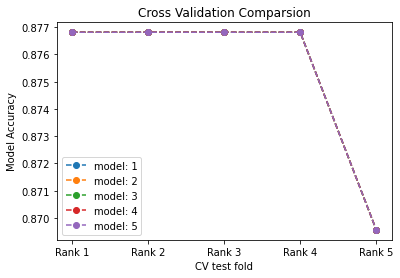

In [ ]:
parameters = {'kernel':['rbf', 'poly'],
              'degree':list(range(2, 5)),
              'C':[1e-3, 1e-2, 1, 1e2, 1e3]}

svm = gridSearch(SVC(), parameters)

Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       151
           1       1.00      1.00      1.00        22

    accuracy                           1.00       173
   macro avg       1.00      1.00      1.00       173
weighted avg       1.00      1.00      1.00       173




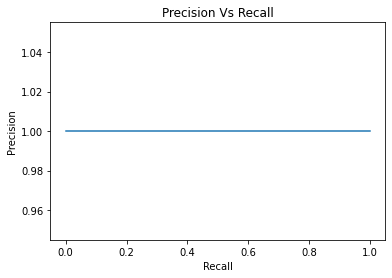

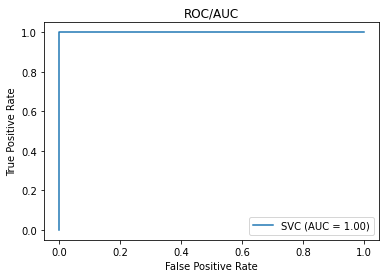

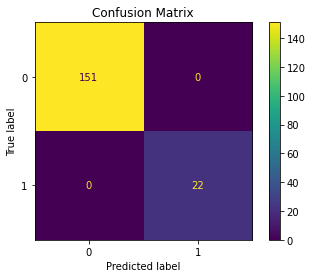

In [ ]:
classificationReport(svm, x_test, y_test)

# Metrics Comparisons
- ROC/AUC
- F1 Scores
- Accuracies

In [ ]:
def plotROC(model, fpr, tpr, roc_auc):
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, label = f'{model.__class__.__name__} (AUC = {np.round(roc_auc, 2)})')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

In [ ]:
def compareROC_AUC(models, X_test, y_test):
  for model in models:
    y_pred = model.predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plotROC(model, fpr, tpr, roc_auc)
  plt.title('ROC/AUC Comparison')
  plt.legend()
  plt.show()

In [ ]:
def compareBar(data, labels, title):
  caps = []
  for label in labels:
    caps.append(''.join(c for c in label if c.isupper()))
  plt.bar(caps, data, width = 0.4)
  for index, value in enumerate(data):
    x = np.round(value, 2)
    plt.text(index - 0.15, 0.05, str(x))
  plt.title(title)
  plt.show()

Models of comparisons
[KNeighborsClassifier(n_neighbors=1, p=1), LogisticRegression(C=100.0, penalty='l1', solver='liblinear'), MultinomialNB(alpha=1), DecisionTreeClassifier(criterion='entropy', max_depth=13, min_samples_split=5), SVC(C=1000.0, degree=2)]



/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


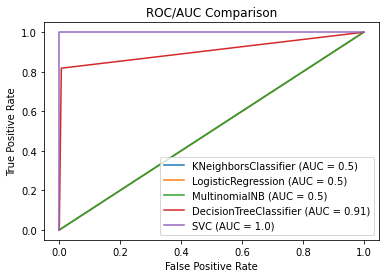

In [ ]:
print(f'Models of comparisons')
print(models)
print()
compareROC_AUC(models, x_test, y_test)

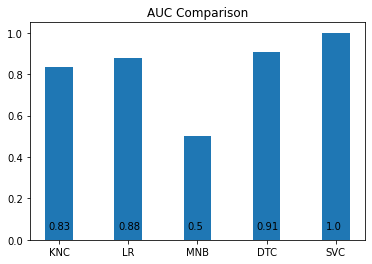

In [ ]:
compareBar(aucs, labels, 'AUC Comparison')

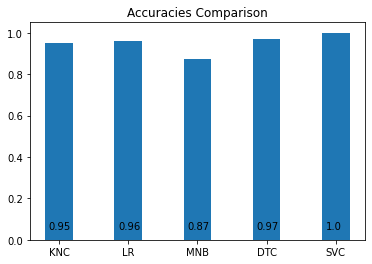

In [ ]:
compareBar(accuracies, labels, 'Accuracies Comparison')

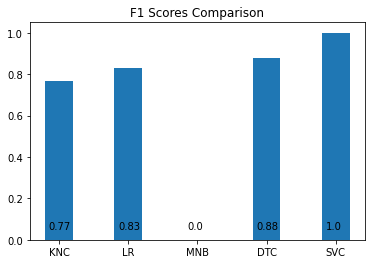

In [ ]:
compareBar(f1scores, labels, 'F1 Scores Comparison')